Enter 1 for FIFO
Enter 2 for LIFO
Enter 3 for SJF
Your Choice is:1
[0.26529150272103663, 0.41864358765527926, 0.30774104860135626, 0.2624003841057569, 0.18368283036516642, 0.34605309831453646, 0.19183973305621327, 0.7411748043442189, 1.1049707273512712, 0.1612007003007511, 0.5229653799897227, 0.25089136984552945, 0.27981094891294095, 0.8660847179751469, 0.02456178497094929, 0.03038700970633349, 0.00680852889474165, 0.5958292265382961, 0.5019280772884052, 0.6801047603151835, 1.281740612722283, 0.5350798529833819, 0.20630981953765617, 0.5055119922933838, 0.04195813727684759, 0.3404772954640243, 0.051576560909215065, 0.9648068165638419, 0.24594242610368622, 0.1785219061002521, 0.10242678436348458, 0.496084946242245, 0.20302747210102834, 0.28011156895587064, 0.00632285722079463, 0.32046030973161976, 0.31566555928125933, 0.3198493242430786, 0.9593050262470078, 0.38171298621679206, 0.1485061642437464, 0.19151080291916103, 0.39870260037779004, 0.020705098641771898, 0.3663041600193465, 0.37019

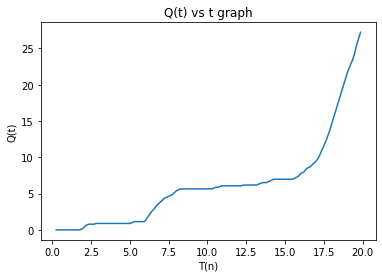

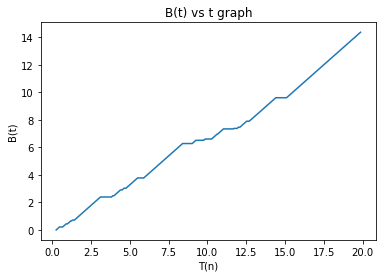

In [3]:
import numpy as np
import random
import sys
np.random.seed(0)

class Simulation:
  def __init__(self,choice):
    #self.interarrivals= [0.4,1.2,0.5,1.7,0.2,1.6,0.2,1.4,1.9]
    #self.service_times= [2.0,0.7,0.2,1.1,3.7,0.6,0.8,0.4,0.2]
    self.interarrivals= list(np.random.exponential(1/3, 105))  #exponential distribution mean 1/3
    self.service_times= list(np.random.exponential(1/4, 105))  #exponential distribution mean 1/4

    print(self.interarrivals)
    print(self.service_times)
    self.clock= 0.0
    
    self.next_arrival=self.interarrivals.pop(0)
    self.next_departure= float('inf')
    
    self.num_in_queue= 0
    self.times_of_arrivalqueue= []         #store times of arrivals who are waiting in the queue
    self.service_times_in_queue= []   #store service times of waiting customers in the queue
    
    self.total_delay=0.0
    self.num_of_delays= 0.0
    self.area_under_q= 0.0
    self.area_under_b= 0.0
    
    self.server_status= 0        #0 for IDLE , 1 for BUSY
    self.last_event_time=0.0     #we will need to store last event clock time 
    self.t=[]
    self.q_t=[]
    self.b_t=[]     

  def start(self):
    print("You have "+str(len(self.interarrivals))+" customer in list. For How many customers you want to simulate???")
    self.n = int(input("Your input is:"))
    print(" ")
    if self.n>len(self.interarrivals):
      sys.exit("Enter a smaller number and try again")
    else:
      while self.num_of_delays<self.n:
        self.timing() 

  def timing(self):
    self.clock= min(self.next_arrival,self.next_departure)  #First set clock to minimum time of next event
    self.update_register()
    if self.next_arrival<= self.next_departure:
      self.arrival()
      print("Arrival at Clock:" +str(self.clock))

    else:
      self.departure()
      print("Departure at "+str(self.clock))
    
    print("Server Status:"+str(self.server_status))
    print("Times of arrivals in Queue: "+ str(self.times_of_arrivalqueue))
    print("Service times in Queue: "+str(self.service_times_in_queue))
    print("Number of Delays: "+str(self.num_of_delays))
    print("Total Delay:" +str(self.total_delay))
    print("Next Arrival Time: "+str(self.next_arrival))
    print("Next Departure Time: "+str(self.next_departure))
    print(" ")

  def arrival(self):
    #Schedule next arrival , new_arrival = previous_arrival + inter_arrival time of next customer
    self.next_arrival+= self.interarrivals.pop(0)  
    
    if self.server_status==0:   #server is idle
      self.server_status= 1    #make server BUSY
      delay=0.0            #so delay is zero
      self.total_delay += delay  
      self.num_of_delays +=1   #increase the number of customers delayed

      #schedule next departure, pop the first element of service_times list to get service time of this customer
      self.next_departure = self.clock+ self.service_times.pop(0) 
  
    else:     #Server is BUSY
      #increase queue length, this customer will have to wait in the queue
      self.num_in_queue+=1

      #store the arrival time and service time of this customer in seperate lists
      self.times_of_arrivalqueue.append(self.clock) 
      self.service_times_in_queue.append(self.service_times.pop(0)) 

  def departure(self):
    #check number of customers in the queue
    if self.num_in_queue==0:  #if no customer in the queue
      #make server IDLE 
      self.server_status= 0
      #schedule next departure= infinity
      self.next_departure= float('infinity')
    
    else: 
      #if queue not empty, pop one customer, decrease queue length
      
      self.num_in_queue-=1
      self.num_of_delays+=1
      #AS FIFO, pop first arrival and service time from the queue. IF LIFO we have to pop last arrival and service time
      #For SJF, finf the index of minimum service time from  service_times_in_queue list.
      #Then pop the arrival of that index from times_of_arrivalqueue for delay count and others.  
      if int(choice) == 1:
        
        arrival= self.times_of_arrivalqueue.pop(0)
      
        delay= self.clock- arrival
        self.total_delay+=delay
        self.next_departure= self.clock+ self.service_times_in_queue.pop(0)

      if int(choice) == 2:

        arrival= self.times_of_arrivalqueue.pop(self.num_in_queue)
      
        delay= self.clock- arrival
        self.total_delay+=delay
        self.next_departure= self.clock+ self.service_times_in_queue.pop(self.num_in_queue)

      if int(choice) == 3:
        min=9999
        index=0
        for i in range(self.num_in_queue+1):
          if self.service_times_in_queue[i] < min:
            min = self.service_times_in_queue[i]
            index = i
        arrival= self.times_of_arrivalqueue.pop(index)
      
        delay= self.clock- arrival
        self.total_delay+=delay
        self.next_departure= self.clock+ self.service_times_in_queue.pop(index)

      if int(choice) == 4:
        #a=random.choice(self.num_in_queue) 
        a=random.randint(0, self.num_in_queue)
        arrival= self.times_of_arrivalqueue.pop(a)
      
        delay= self.clock- arrival
        self.total_delay+=delay
        self.next_departure= self.clock+ self.service_times_in_queue.pop(a)


  def update_register(self):
    time_differnce= self.clock - self.last_event_time
    self.area_under_q+=self.num_in_queue*time_differnce
    self.area_under_b+=self.server_status*time_differnce
    self.last_event_time=self.clock
    self.t.append(self.clock)
    self.q_t.append(self.area_under_q)
    self.b_t.append(self.area_under_b)
    print("Area under Q(t) "+str(self.area_under_q))
    print("Area under B(t) "+str(self.area_under_b))

  def final_calculation(self):
    self.avg_delay= self.total_delay/self.n
    self.expected_no_of_customer=self.area_under_q/self.clock
    self.expected_utilization= self.area_under_b/self.clock
    print("Average delay "+str(self.avg_delay))
    print("Expected number of customers in the queue "+str(self.expected_no_of_customer))
    print("Expected utilization of the server "+str(self.expected_utilization))
  
  def plot_graph(self):
    import matplotlib.pyplot as plt 
    plt.plot(self.t, self.q_t)
    plt.xlabel('T(n)') 
    plt.ylabel('Q(t)') 
    plt.title('Q(t) vs t graph')  
    plt.show()  

    plt.plot(self.t, self.b_t)
    plt.xlabel('T(n)') 
    plt.ylabel('B(t)') 
    plt.title('B(t) vs t graph')  
    plt.show()

print("Enter 1 for FIFO")
print("Enter 2 for LIFO")
print("Enter 3 for SJF")
choice = input("Your Choice is:")
if int(choice)>=1 and int(choice)<= 4: 
  s= Simulation(choice)
  s.start()
  s.final_calculation()
  s.plot_graph()
else:
  sys.exit("Wrong choice!!! Try again")